In [31]:
from datetime import datetime, timedelta, timezone
from dateutil import tz
import datetime
#from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#https://strftime.org/
d=datetime.datetime.now()

dateList=['2017-12-31','2001-01-01','2010-11-21']

for item in dateList:
    diff_days=(d-datetime.datetime.strptime(item,'%Y-%m-%d')).days
    if (diff_days/365)>5:
        print(item," found")

2001-01-01  found
2010-11-21  found


In [33]:
#https://strftime.org/
d=datetime.datetime.now()
print(d.strftime("%Y/%m/%d"))
print(d.strftime("%H:%m %p"))
match=d.strftime("%H:%m %p")=="14:00 PM"
print(match)

2020/11/11
05:11 AM
False


In [34]:

d1=date(2017,11,5)
d2=date(2017,12,4)

delta= d2 - d1

print(delta.days)

29


      column1     column2
0  2017-01-01  2017-01-01
1  2017-01-01  2017-01-11
2  2017-01-02  2017-03-09
3  2017-01-03  2017-03-16
4  2017-01-04  2017-01-10
      column1     column2  differences classification
0  2017-01-01  2017-01-01            0        level 0
1  2017-01-01  2017-01-11           10        level 3
2  2017-01-02  2017-03-09           66        level 4
3  2017-01-03  2017-03-16           72        level 5
4  2017-01-04  2017-01-10            6        level 2


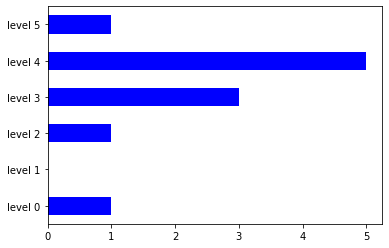

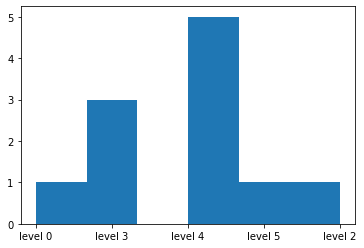

NameError: name 'sns' is not defined

In [35]:
from datetime import datetime

column1=['2017-01-01','2017-01-01','2017-01-02','2017-01-03','2017-01-04','2017-01-05','2017-01-06','2017-01-07','2017-01-08','2017-01-09','2017-01-10']        
column2=['2017-01-01','2017-01-11','2017-03-09','2017-03-16','2017-01-10','2017-01-25','2017-01-25','2017-01-26','2017-01-15','2017-02-16','2017-01-24' ]
index=range(0,len(column1))
data={'column1':column1,'column2':column2}
df=pd.DataFrame(data, columns=['column1','column2'],index=index)
print(df.head())

differences=df.apply(lambda x: datetime.strptime(x['column2'],'%Y-%m-%d')-datetime.strptime(x['column1'],'%Y-%m-%d'),axis=1)
differences=differences.dt.days.astype('int')
#print(differences)
#years_bins = pd.IntervalIndex.from_tuples([(-1, 0),(0, 2),(2,6),(6, 15),(15,69),(69,np.inf)])
years_bins=[-1,0,2,6,15,69,np.inf]
output_labels=['level 0','level 1','level 2','level 3','level 4','level 5']    

out=pd.cut(differences,bins=years_bins,labels=output_labels)
df['differences']=differences
df['classification']=out

print(df.head())

fig, ax = plt.subplots()
ax = out.value_counts(sort=False).plot.barh(rot=0, color="b", figsize=(6,4))
ax.set_yticklabels(output_labels)
#ax.ylabel('Years of Coding Experience')
plt.show()

plt.hist(df['classification'], bins=6)
plt.show()

sns.distplot(df['differences'])
plt.show()


In [36]:
print("Eastern Standard Time Zone")
ET=timezone(timedelta(hours=-5))
#print(ET)
#print(datetime(1970,1,1, tzinfo=timezone.utc))

tzinfo=timezone.utc
dt=datetime(2017,12,30,15,9,3)
#dt=datetime(2017,12,30,15,9,3,tzinfo=ET)
#print (dt)
print(dt.astimezone(ET))

print("India Standard Time Zone")

IST= timezone(timedelta(hours=5,minutes=30))
dt=datetime(2017,12,30,15,9,3)
print(dt.astimezone(IST))
print(dt.replace(tzinfo=timezone.utc))

Eastern Standard Time Zone
2017-12-30 17:09:03-05:00
India Standard Time Zone
2017-12-31 03:39:03+05:30
2017-12-30 15:09:03+00:00


In [37]:
edt = timezone(timedelta(hours=-4))
dt=datetime(2017,12,30,15,9,3)
print(dt)
dt=dt.replace(tzinfo=edt)

print(dt)

2017-12-30 15:09:03
2017-12-30 15:09:03-04:00


In [4]:
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

spring_ahead_159am = datetime(2017,3,12,1,59,59, tzinfo=EST)
print(spring_ahead_159am.isoformat())

spring_ahead_3am=datetime(2017,3,12,3,0,0,tzinfo=EDT)
spring_ahead_3am.isoformat()

print("Elapsed seconds: ",(spring_ahead_3am - spring_ahead_159am).total_seconds())

2017-03-12T01:59:59-05:00
Elapsed seconds:  1.0


In [5]:
eastern = tz.gettz('America/New_York')
spring_ahead_159am = datetime(2017,3,12,1,59,59, tzinfo=eastern)
spring_ahead_3am=datetime(2017,3,12,3,0,0,tzinfo=eastern)
print(((spring_ahead_3am - spring_ahead_159am).total_seconds()))




3601.0


In [6]:
eastern = tz.gettz('US/Eastern')
first_1am = datetime(2017,11,5,1,0,0,tzinfo=eastern)

print(tz.datetime_ambiguous(first_1am))

print("1am can happen twice in the eastern time zone as daylight saving falls back")

second_1am = datetime(2017,11,5,1,0,0,tzinfo=eastern)

second_1am = tz.enfold(second_1am)

print((second_1am-first_1am).total_seconds())

print("python does not take in difference the two times.")
print("enfold is a placeholder")


True
1am can happen twice in the eastern time zone as daylight saving falls back
0.0
python does not take in difference the two times.
enfold is a placeholder
